# Module 6: Descriptive and Predictive Modeling

### Work performed by:
#### Rafael Haba Díaz 79030459K
#### Hugo Puerto Rosello 76884689J

## Homework 1.A - Optimization (basic, obligatory)


In [10]:
#import libraries
import random
import math
from matplotlib import pyplot as plt

## Explanation generate_population:
 This function makes a population of n individuals where every individual is composed of an x and an y.  The size of the population is defined by the variable "size". 

 The boundaries where the "x" and "y" are moving is set with an uniform random function where the boundaries are set, in this case, between "lower_x_boundary", "upper_x_boundary", "lower_y_boundary", "upper_y_boundary".

In [28]:
def generate_population(size, x_boundaries, y_boundaries):
    lower_x_boundary, upper_x_boundary = x_boundaries
    lower_y_boundary, upper_y_boundary = y_boundaries

    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(lower_x_boundary, upper_x_boundary),
            "y": random.uniform(lower_y_boundary, upper_y_boundary),
        }
        population.append(individual)

    return population


## Explanation sort_population_by_fitness:
### As it name's says, this function sorts the population by fitness.

In [12]:
def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)

## Explanation apply_function:
For every individual, this function returns the result of an operation.

In [ ]:
def apply_function(individual):
    x = individual["x"]
    y = individual["y"]
    firstSum = x**2.0 + y**2.0
    secondSum = math.cos(2.0*math.pi*x) + math.cos(2.0*math.pi*y) 
    n = 2
    return -(-20.0*math.exp(-0.2*math.sqrt(firstSum/n)) - math.exp(secondSum/n) + 20 + math.e)

## Explanation select_by_roulette:
The select by roulette is a selection algorithm that consists on selecting an individual (in this case, we are using it to select a parent). The better the individual is, the more changes it has to be selected.

In [13]:
def select_by_roulette(sorted_population, fitness_sum):
    offset = 0
    normalized_fitness_sum = fitness_sum

    lowest_fitness = apply_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = -lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in sorted_population:
        fitness = apply_function(individual) + offset
        try:
            probability = fitness / normalized_fitness_sum                
            accumulated += probability

        except:
            print("Proceso Terminado")
            break
        
        if draw <= accumulated:
            return individual

## Explanation crossover:
It consists on making a new individual through it's father and mother. So we select the 'xa' and 'ya' from the father and the 'xb' and 'yb' from the mother. Then we return the new individual that is going to be the mean of the x and y between it's father and it's mother.

In [15]:
def crossover(individual_a, individual_b):
   
    xa = individual_a["x"]
    ya = individual_a["y"]
    
    xb = individual_b["x"]
    yb = individual_b["y"]
    
     
    return {"x": (xa + xb) / 2, "y": (ya + yb) / 2}


## Explanation mutate:
This function consists on adding to the individual's component 'x' and 'y' a value that is going to be determined by a random gauss function.

In this case, we have choosen a random gauss function which has in it's boundaries 0 and fitness/100, we have done like this, because the right boundary is going to be higher when the individual's fitness is worse, making bigger changes when it's fitness is really bad and little changes when it's  fitness is good. 

In [16]:
def mutate(individual):
    next_x = individual["x"] + random.gauss(0,apply_function(individual)/100) #random.gauss(0,apply_function(individual)/100) random.uniform(-0.05, 0.05)
    next_y = individual["y"] + random.gauss(0,apply_function(individual)/100)#random.gauss(0,apply_function(individual)/100) random.uniform(-0.05, 0.05)

    lower_boundary, upper_boundary = (-4, 4)

    # Guarantee we keep inside boundaries
    next_x = min(max(next_x, lower_boundary), upper_boundary)
    next_y = min(max(next_y, lower_boundary), upper_boundary)

    return {"x": next_x, "y": next_y}

## Explanation make_next_generation:
1) We sort the previous population and then we select the father and mother using the select by roulette function. 

2) Father and mother should be different ones, so we execute the select by roulette function until this is not true.
3) Then using the mother and father, we make a crossover and then a mutation. 

4) The next step is selecting the better fitness between father, mother and the individual from the new generation.

5) We make sure that the new generation is going to be better than the previous one. For this, we have joined the new and the previous generation and then we order then by their fitness, then we drop those N individuals, where N is the population's size, so that we have the best individuals from both generations.

In [29]:
def make_next_generation(previous_population):
    ok = False
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    print("\n---------------\n")
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in population)
    print("fitness_sum:\n"+ str(fitness_sum))
    for i in range(population_size):
        father = select_by_roulette(sorted_by_fitness_population, fitness_sum)
        mother = select_by_roulette(sorted_by_fitness_population, fitness_sum)
        
       
        while(father == mother and ok == True):
              print("while")
              father = select_by_roulette(sorted_by_fitness_population, fitness_sum)
              mother = select_by_roulette(sorted_by_fitness_population, fitness_sum)
              if(father != mother):
                  ok = False
      
        individual = crossover(father, mother)
        individual = mutate(individual)
        
        
       
        if (abs(0 - apply_function(father)) < abs(0 - apply_function(individual)) and 
            (abs(0 - apply_function(father)) < abs(0 - apply_function(mother)))):                 
            next_generation.append(father)
            
        elif (abs(0 - apply_function(mother)) < abs(0 - apply_function(individual)) and
              (abs(0 - apply_function(mother)) < abs(0 - apply_function(father)))):
            next_generation.append(mother)
         
        else:
            next_generation.append(individual) 
        
    for i in range (len(sorted_by_fitness_population)):
        next_generation.append(sorted_by_fitness_population[i])
     
       
    next_generation = sort_population_by_fitness(next_generation)
    print("\n-----------nextGen24-------------\n")
    for individual in next_generation:       
        print(individual, apply_function(individual)) 
    
    
    print("\n-----------pop-------------\n")
    for i in range(len(sorted_by_fitness_population)):
        j = 0
        print(next_generation[j])       
        next_generation.pop(j)
     
    print("\n-----------nextGen12-------------\n")
    for individual in next_generation:       
        print(individual, apply_function(individual)) 
    return next_generation


## Main explanation:

The first step in this algorithm is generating the population, in this case, we generate a population of 12 individuals with boundaries between -5 and 5 for x and y, the number of generations is set to 100. Then, we sort the population by fitness, where the better fitness individuals are the ones which fitness are nearer to 0 and the worse ones are the individuals wich fitness are far from 0. 

The next step is applying the function to every individual of the actual population. So we are going to make generations until we reach the number of generations that we have set, in this case, as we said before, it is set to 100. 

The "make_next_generation" function makes a new generation from a father and mother that were selected through the "select_by_roulette" algorithm, then this new generation is added to the previous generation and sorted from better to worse fitness so that we make sure that we are selecting the best individuals from both generations. 

When we reach the generations that we have set at the beginning of the algorithm, we print the best indivividual and plot the evolution of the algorithm where the x-axis represents the generations and the y-axis represents the fitness of the best individual. 

1
{'x': -3.81299228217666, 'y': 4.569443976257729} -13.32755039629651
{'x': 3.6436058294284894, 'y': 4.870662599444453} -13.222464793296254
{'x': -2.6315068594717195, 'y': -4.963848014254806} -12.522575726628645
{'x': -3.3568812844847287, 'y': 3.4110358909477547} -12.074097516752591
{'x': -2.981906017766023, 'y': 4.354149645008631} -12.02401373594975
{'x': 4.662234281868443, 'y': -0.3355548067658978} -11.796329197427692
{'x': -4.063639430100114, 'y': 2.500598595390975} -11.571546919109498
{'x': 3.3128792990208353, 'y': -2.874945094074847} -10.78827276035786
{'x': 0.4950699289595022, 'y': 3.884338061495077} -10.34118814920676
{'x': 4.057625695525861, 'y': -0.1959855519471727} -9.57339813953556
{'x': 1.2576284931006487, 'y': -0.0589003386799245} -4.4241631347272765
{'x': -0.1496708109490843, 'y': 0.5802589299571963} -3.476659729763267

---------------

fitness_sum:
-125.14226019905166

-----------nextGen20-------------

{'x': -3.81299228217666, 'y': 4.569443976257729} -13.32755039629651


{'x': -0.022410628796939322, 'y': 0.3543967590578131} -2.48849904138557
{'x': -0.022410628796939322, 'y': 0.3543967590578131} -2.48849904138557
{'x': -0.022410628796939322, 'y': 0.3543967590578131} -2.48849904138557
{'x': -0.022410628796939322, 'y': 0.3543967590578131} -2.48849904138557
{'x': -0.022410628796939322, 'y': 0.3543967590578131} -2.48849904138557
{'x': -0.028861916277085883, 'y': 0.3455666591415908} -2.4426326611546654
{'x': 0.0014725482826429062, 'y': 0.3357272834478435} -2.3699821579209837
{'x': 0.0035441910985572755, 'y': 0.3071855786592171} -2.1858525997617453

-----------pop-------------

{'x': -0.09046312940528971, 'y': 0.4166112050557834}
{'x': -0.09046312940528971, 'y': 0.4166112050557834}
{'x': -0.09046312940528971, 'y': 0.4166112050557834}
{'x': -0.09046312940528971, 'y': 0.4166112050557834}
{'x': -0.04617917901323218, 'y': 0.4349627456891573}
{'x': -0.025070641132803908, 'y': 0.42115757459123637}
{'x': -0.033351040183353386, 'y': 0.41934363980733524}
{'x': -0.0333

{'x': -0.008482992184028173, 'y': 0.18839901087574207} -1.2548737412976512
{'x': -0.005602410284790615, 'y': 0.18797204751085006} -1.250132617891691
{'x': -0.022396402718371414, 'y': 0.18308574211067874} -1.2212269550521389
{'x': -0.022396402718371414, 'y': 0.18308574211067874} -1.2212269550521389
{'x': -0.022396402718371414, 'y': 0.18308574211067874} -1.2212269550521389
{'x': -0.015714969646026016, 'y': 0.18378109749184054} -1.2202024647078784
{'x': -0.0028283102603560185, 'y': 0.18344096555201142} -1.2107555270179309
{'x': -0.026015318773289296, 'y': 0.17516036020974435} -1.1587355398887138
{'x': -0.030643798838389757, 'y': 0.17073107363817344} -1.1286332509547212

 Mejor individuo: 

{'x': -0.030643798838389757, 'y': 0.17073107363817344} -1.1286332509547212
19
{'x': -0.0011471954019275123, 'y': 0.18962646676872394} -1.2634589347327148
{'x': -0.0011471954019275123, 'y': 0.18962646676872394} -1.2634589347327148
{'x': -0.060266199608649845, 'y': 0.177739748924262} -1.260598876444107
{'

{'x': -0.003769993284962067, 'y': 0.11286389906026248} -0.6258911492596053
{'x': -0.00752397171457672, 'y': 0.10637727615256963} -0.5780065727945893
{'x': -0.011812503779191706, 'y': 0.10446283378123378} -0.5667483268566298

---------------

fitness_sum:
-7.6885065791973055

-----------nextGen20-------------

{'x': -0.0026228272784501253, 'y': 0.11802344124662428} -0.665748810602754
{'x': -0.0026228272784501253, 'y': 0.11802344124662428} -0.665748810602754
{'x': -0.0026228272784501253, 'y': 0.11802344124662428} -0.665748810602754
{'x': -0.0026228272784501253, 'y': 0.11802344124662428} -0.665748810602754
{'x': -0.0026228272784501253, 'y': 0.11802344124662428} -0.665748810602754
{'x': -0.01578269845055933, 'y': 0.11599698182145379} -0.6585145617221468
{'x': -0.010598945826745842, 'y': 0.11496458047196544} -0.64565090263735
{'x': -0.006537065522008541, 'y': 0.11495536529273878} -0.6430934193003464
{'x': -0.014327782144452976, 'y': 0.11404434928598806} -0.6418575936128694
{'x': -0.00376999

{'x': -0.008893614558735866, 'y': 0.06434399194298845} -0.29230801768057946
{'x': -0.006648560171207163, 'y': 0.06435904869622841} -0.29074600870528444
{'x': -0.008513740302061939, 'y': 0.06320205342876632} -0.28516916119313906
{'x': -0.00959328289386836, 'y': 0.061912914738527704} -0.278474831412876

---------------

fitness_sum:
-3.585886246456818

-----------nextGen20-------------

{'x': -0.008944740032220793, 'y': 0.06660245506790469} -0.30601255545088835
{'x': -0.008944740032220793, 'y': 0.06660245506790469} -0.30601255545088835
{'x': -0.008944740032220793, 'y': 0.06660245506790469} -0.30601255545088835
{'x': -0.008944740032220793, 'y': 0.06660245506790469} -0.30601255545088835
{'x': -0.006536558140938689, 'y': 0.06672110510338215} -0.30500209734415096
{'x': -0.006839217536403568, 'y': 0.06642445286658046} -0.3033786361057449
{'x': -0.006839217536403568, 'y': 0.06642445286658046} -0.3033786361057449
{'x': -0.006839217536403568, 'y': 0.06642445286658046} -0.3033786361057449
{'x': -

{'x': -0.009770792222376576, 'y': 0.047832151416146634} -0.20035330199218082
{'x': -0.009770792222376576, 'y': 0.047832151416146634} -0.20035330199218082
{'x': -0.009770792222376576, 'y': 0.047832151416146634} -0.20035330199218082

 Mejor individuo: 

{'x': -0.009770792222376576, 'y': 0.047832151416146634} -0.20035330199218082
40
{'x': -0.008116866274006592, 'y': 0.048923603014537846} -0.20447265560258332
{'x': -0.005177404306320554, 'y': 0.04892897957817837} -0.20236685727838521
{'x': -0.005177404306320554, 'y': 0.04892897957817837} -0.20236685727838521
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.20079585837034886
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.20079585837034886
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.20079585837034886
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.20079585837034886
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.20079585837034886
{'x': -0.008715471814229766, 'y': 0.04812142481967101} -0.2

{'x': -0.006393431616352199, 'y': 0.03630270948782663} -0.1400474007174819
{'x': -0.006393431616352199, 'y': 0.03630270948782663} -0.1400474007174819
{'x': -0.005430093655841264, 'y': 0.03622720369318098} -0.13895643678009195
{'x': -0.005430093655841264, 'y': 0.03622720369318098} -0.13895643678009195
{'x': -0.005430093655841264, 'y': 0.03622720369318098} -0.13895643678009195
{'x': -0.005430093655841264, 'y': 0.03622720369318098} -0.13895643678009195
{'x': -0.005902758878483612, 'y': 0.0358515943549048} -0.1375499744855877
{'x': -0.005902758878483612, 'y': 0.0358515943549048} -0.1375499744855877
{'x': -0.005902758878483612, 'y': 0.0358515943549048} -0.1375499744855877
{'x': -0.005902758878483612, 'y': 0.0358515943549048} -0.1375499744855877
{'x': -0.005902758878483612, 'y': 0.0358515943549048} -0.1375499744855877
{'x': -0.005033576374864784, 'y': 0.03561750588772337} -0.13583781331931322
{'x': -0.006457003837218977, 'y': 0.0352623477765671} -0.13526413988430663

-----------pop----------

{'x': -0.002338405932040637, 'y': 0.025177240053336557} -0.0884545604617668
{'x': -0.002338405932040637, 'y': 0.025177240053336557} -0.0884545604617668
{'x': -0.002338405932040637, 'y': 0.025177240053336557} -0.0884545604617668
{'x': -0.0031186449041960326, 'y': 0.02508666727251582} -0.08843077320102966
{'x': -0.003089304570606308, 'y': 0.02501666461861647} -0.08812683239607866
{'x': -0.001337708523894599, 'y': 0.025012071019491322} -0.08746622111377933
{'x': -0.001337708523894599, 'y': 0.025012071019491322} -0.08746622111377933
{'x': -0.001337708523894599, 'y': 0.025012071019491322} -0.08746622111377933
{'x': -0.001337708523894599, 'y': 0.025012071019491322} -0.08746622111377933
{'x': -0.001337708523894599, 'y': 0.025012071019491322} -0.08746622111377933
{'x': -0.004242101671255521, 'y': 0.02454903095953964} -0.08690848724768019

 Mejor individuo: 

{'x': -0.004242101671255521, 'y': 0.02454903095953964} -0.08690848724768019
57
{'x': -0.002338405932040637, 'y': 0.025177240053336557} -0

67
{'x': -0.0003461189651014488, 'y': 0.018614048069544996} -0.06186065925081197
{'x': -0.0003461189651014488, 'y': 0.018614048069544996} -0.06186065925081197
{'x': -0.0003838371100974988, 'y': 0.018513025828919696} -0.061478502009578495
{'x': -0.0003838371100974988, 'y': 0.018513025828919696} -0.061478502009578495
{'x': -0.0003838371100974988, 'y': 0.018513025828919696} -0.061478502009578495
{'x': 0.0011019428605816622, 'y': 0.01847735628425209} -0.061452594180061215
{'x': 0.0004968149778711948, 'y': 0.01844423416572878} -0.061226921348535246
{'x': 6.504343490917381e-05, 'y': 0.018416864246715906} -0.061097757844511325
{'x': 0.0001924162832906707, 'y': 0.018344741854383406} -0.060826957131262294
{'x': -0.00024461932268302826, 'y': 0.018279329276494245} -0.06058088297761133
{'x': -0.0011020834692615001, 'y': 0.01794309526083323} -0.059428972859180806
{'x': 0.0004244334633278438, 'y': 0.017894906107189294} -0.059138067118980064

---------------

fitness_sum:
-0.7319089779905017

-------


{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003331346068850229, 'y': 0.013533894520275605} -0.04316422757537852
{'x': 0.0003341108249226882, 'y': 0.013504364402618553} -0.043059617568574016
{'x': -7.400194439819455e-05, 'y': 0.013345537417832653} -0.04248323874550097
{'x': 8.844587143231675e-05, 'y': 0.013312672331554962} -0.042367333951343955
{'x': 8.844587143231675e-05, 'y': 0.013312672331554962} -0.042367333951343955
{'x': -0.00023776345732234595, 'y': 0.013287847000692085} -0.0422860640501459
{'x': -0.00023776345732234595, 'y': 0.013287847000692085} -0.0422860640501459
{'x': 0.0011210593205915327, 'y': 0.013228028003236554} -0.0422347667

{'x': 0.0012804820865596595, 'y': 0.010060910992179083} -0.03142284458754263
{'x': 0.0008140674609769874, 'y': 0.01008301992988804} -0.03133447841369419
{'x': 0.0008140674609769874, 'y': 0.01008301992988804} -0.03133447841369419
{'x': 0.0010910847033554771, 'y': 0.010025171322601528} -0.031228616089209016
{'x': -0.00024991618777929486, 'y': 0.01001822858331413} -0.031016648102028643
{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968
{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968
{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968
{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968
{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968

 Mejor individuo: 

{'x': 0.0005542330803843062, 'y': 0.009634605181022002} -0.02977390474299968
84
{'x': 7.882917519064065e-05, 'y': 0.010354853357191166} -0.032141610476959404
{'x': 7.882917519064065e-05, 'y': 0.01035485335719


-----------pop-------------

{'x': 0.0009198536278515288, 'y': 0.007555662427636586}
{'x': 0.0005853059644134907, 'y': 0.007505053866680812}
{'x': 0.0005853059644134907, 'y': 0.007505053866680812}
{'x': 0.0005853059644134907, 'y': 0.007505053866680812}
{'x': 0.0002985611812806688, 'y': 0.007519648310432532}
{'x': 0.000696852653155096, 'y': 0.007408534516712705}
{'x': 0.000696852653155096, 'y': 0.007408534516712705}
{'x': 0.000696852653155096, 'y': 0.007408534516712705}
{'x': 0.000696852653155096, 'y': 0.007408534516712705}
{'x': 0.0004123512009102679, 'y': 0.0074297057832980315}
{'x': 0.0007500634274044107, 'y': 0.00738747064252068}
{'x': 0.00030305883897050395, 'y': 0.007327190155232522}

-----------nextGen10-------------

{'x': 0.0005575944408178877, 'y': 0.007308575683140849} -0.022161858590135086
{'x': 0.0005607115177675562, 'y': 0.007293492244757737} -0.02211422705640631
{'x': 0.0007052948842121564, 'y': 0.007243297496477273} -0.021993734873739346
{'x': 0.0007052948842121564, 'y'

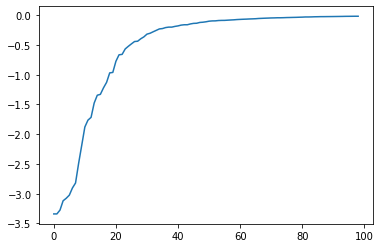

In [27]:
# =============================================================================
# MAIN
# =============================================================================

generations = 100
population = generate_population(size=12, x_boundaries=(-5, 5), y_boundaries=(-5, 5))
population = sort_population_by_fitness(population)

i = 1
bestFitness = []
while True:
    
    print(str(i))

    for individual in population:
        print(individual, apply_function(individual))

    if i == generations:
        break

    i += 1

    population = make_next_generation(population)
    
    population = sort_population_by_fitness(population)
    best_individual = sort_population_by_fitness(population)[-1]
    bestFitness.append(apply_function(best_individual))
    print("\n Mejor individuo: \n")
    print(best_individual , apply_function(best_individual))
    
best_individual = sort_population_by_fitness(population)[-1]
plt.plot(bestFitness)

print("\nFINAL RESULT")
print(best_individual, apply_function(best_individual))